In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score


In [22]:
#데이터 불러오기
dataset = pd.read_csv('./colon_cancer_blood_dataset.csv')
dataset.head()

,ID_REF,GSM5001936,GSM5001937,GSM5001938,GSM5001939,GSM5001940,GSM5001941,GSM5001942,GSM5001943,GSM5001944,...,GSM5002047,GSM5002048,GSM5002049,GSM5002050,GSM5002051,GSM5002052,GSM5002053,GSM5002054,GSM5002055,GSM5002056
0,1007_s_at,725.8980,796.0900,512.20100,1073.3500,911.0790,723.7810,853.90600,797.07600,447.0500,...,989.9150,771.9320,560.6720,909.0870,537.1380,950.6690,1401.660,1086.33000,1073.8700,1053.52000
1,1053_at,395.5860,399.6040,387.95500,370.9710,470.6210,382.3690,307.47900,355.33600,426.2140,...,468.1380,339.8340,444.1970,277.7600,433.6500,441.2880,482.165,281.64000,362.3690,459.42000
2,117_at,2733.8700,2608.8000,2322.60000,2639.6300,3788.7800,4272.0200,2723.17000,2084.72000,4792.2900,...,2862.3600,2175.9300,2152.0700,1599.2100,2378.1300,1448.0500,2308.200,1598.52000,3011.1000,2247.66000
3,121_at,1440.2100,1500.6300,1262.00000,1547.6700,1092.4300,1104.6600,1393.71000,948.32200,676.1600,...,1695.9300,829.6490,1411.2200,1510.9200,1765.7500,1642.1500,1986.370,1558.57000,1989.4400,2080.07000
4,1255_g_at,38.3712,39.1397,5.62705,10.2502,58.7812,35.7721,6.09315,4.19176,22.2372,...,82.0326,32.7375,23.0333,39.0699,18.0678,12.3742,118.104,9.95137,56.7037,9.38501


In [23]:
dataset = dataset.transpose()
dataset = dataset.rename(columns=dataset.iloc[0])
dataset.drop(dataset.index[0], inplace=True)
dataset.drop(dataset.columns[-1], axis=1, inplace = True)


In [24]:
dataset.head()

,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
GSM5001936,725.898,395.586,2733.87,1440.21,38.3712,1259.94,282.894,22.3207,23357.6,61.4845,...,32278.4,19026.7,83572.0,59173.0,927.437,406.163,580.921,42.1028,81.7244,9.91339
GSM5001937,796.09,399.604,2608.8,1500.63,39.1397,1121.5,206.749,95.3111,20629.3,100.375,...,35960.7,22217.7,94596.8,65353.5,1360.55,646.118,969.375,51.2552,16.7812,5.35075
GSM5001938,512.201,387.955,2322.6,1262.0,5.62705,1126.7,347.664,12.371,27487.3,109.289,...,27478.8,17796.6,75012.9,52527.9,1149.93,623.787,938.115,36.6352,38.5536,3.54501
GSM5001939,1073.35,370.971,2639.63,1547.67,10.2502,1708.83,380.185,6.04854,40321.1,18.2195,...,62129.5,38590.3,187277.0,111348.0,383.647,117.674,223.904,24.8811,97.5604,11.6109
GSM5001940,911.079,470.621,3788.78,1092.43,58.7812,1173.27,206.402,34.4467,14319.7,98.1218,...,31335.8,19608.5,89518.4,60446.0,791.052,211.981,403.888,10.6119,30.3497,4.82076


In [25]:
dataset.shape

(121, 54675)

In [26]:
dataset = dataset.astype(float)

In [27]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 121 entries, GSM5001936 to GSM5002056
Columns: 54675 entries, 1007_s_at to AFFX-TrpnX-M_at
dtypes: float64(54675)
memory usage: 50.5+ MB


In [28]:
dataset['label'] = 0
label=dataset['label'].copy()
label[62:] = 1
dataset['label'] = label
print(dataset.sample(10))


            1007_s_at  1053_at   117_at    121_at  1255_g_at  1294_at  \
GSM5001999    449.939  313.459  3463.42   773.577    2.36404  1257.45   
GSM5002040    739.061  323.431  2832.61  1030.020    4.56984  1726.73   
GSM5002026    548.046  440.419  2004.09  1428.990    8.06940  1376.54   
GSM5002042    762.723  471.940  2049.25  1330.490    8.46255  2459.26   
GSM5002002    294.411  383.143  2911.48   704.427   45.51480  1016.80   
GSM5001970    757.428  304.677  2176.02   915.898   12.72660  1379.29   
GSM5001946    681.135  555.720  4722.07  1081.570   50.50960   899.71   
GSM5002036    762.966  355.931  1375.75  2054.510  114.82000  2112.78   
GSM5002010    639.030  332.241  2474.86  1341.310   35.42180  1025.49   
GSM5001939   1073.350  370.971  2639.63  1547.670   10.25020  1708.83   

            1316_at   1320_at  1405_i_at  1431_at  ...  AFFX-r2-Ec-bioD-5_at  \
GSM5001999  336.967   6.13305    23657.2  31.2548  ...               24048.9   
GSM5002040  258.489  13.84580    376

In [29]:
#각각의 label이 몇 개의 데이터로 이루어져있는지 확인
dataset['label'].value_counts()

0    62
1    59
Name: label, dtype: int64

In [30]:
X = dataset.drop(['label'], axis=1)
y = dataset['label']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2 )
print(X)
print(y)
dataset.info()

            1007_s_at  1053_at   117_at   121_at  1255_g_at  1294_at  1316_at  \
GSM5001936    725.898  395.586  2733.87  1440.21   38.37120  1259.94  282.894   
GSM5001937    796.090  399.604  2608.80  1500.63   39.13970  1121.50  206.749   
GSM5001938    512.201  387.955  2322.60  1262.00    5.62705  1126.70  347.664   
GSM5001939   1073.350  370.971  2639.63  1547.67   10.25020  1708.83  380.185   
GSM5001940    911.079  470.621  3788.78  1092.43   58.78120  1173.27  206.402   
...               ...      ...      ...      ...        ...      ...      ...   
GSM5002052    950.669  441.288  1448.05  1642.15   12.37420  2558.49  413.438   
GSM5002053   1401.660  482.165  2308.20  1986.37  118.10400  2004.94  588.651   
GSM5002054   1086.330  281.640  1598.52  1558.57    9.95137  1790.74  517.305   
GSM5002055   1073.870  362.369  3011.10  1989.44   56.70370  2546.02  547.327   
GSM5002056   1053.520  459.420  2247.66  2080.07    9.38501  1681.98  386.627   

             1320_at  1405_

In [31]:
#SMOTE 오버샘플링 적용

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
print(y_train.value_counts())
smote = SMOTE()
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', X_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', X_train_over.shape, y_train_over.shape)
print(y_train_over.value_counts())

0    49
1    47
Name: label, dtype: int64
SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (96, 54675) (96,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (98, 54675) (98,)
0    49
1    49
Name: label, dtype: int64


In [32]:
#랜덤 포레스트 예측
rf_clf = RandomForestClassifier(n_estimators = 1000, max_depth = 100)
rf_clf.fit(X_train_over, y_train_over)
pred = rf_clf.predict(X_test)

In [33]:
def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test,pred)

    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}'.format(accuracy,precision, recall,f1))

In [34]:
get_clf_eval(y_test, pred)

오차 행렬
[[13  0]
 [ 3  9]]
정확도: 0.8800, 정밀도: 1.0000, 재현율: 0.7500, F1:0.8571


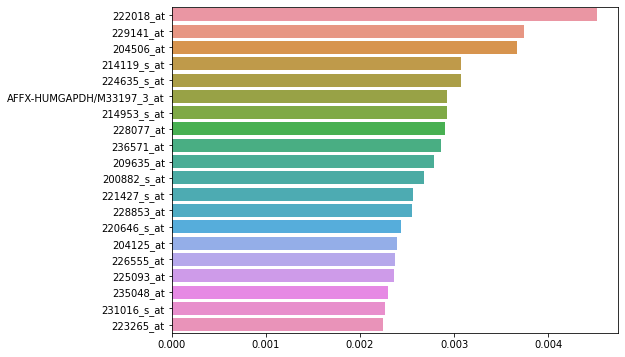

<class 'pandas.core.series.Series'>
Index: 20 entries, 222018_at to 223265_at
Series name: None
Non-Null Count  Dtype  
--------------  -----  
20 non-null     float64
dtypes: float64(1)
memory usage: 876.0+ bytes
None


In [35]:
#feature importance 분석
ftr_importances_values = rf_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = X_train_over.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()
print(ftr_top20.info())

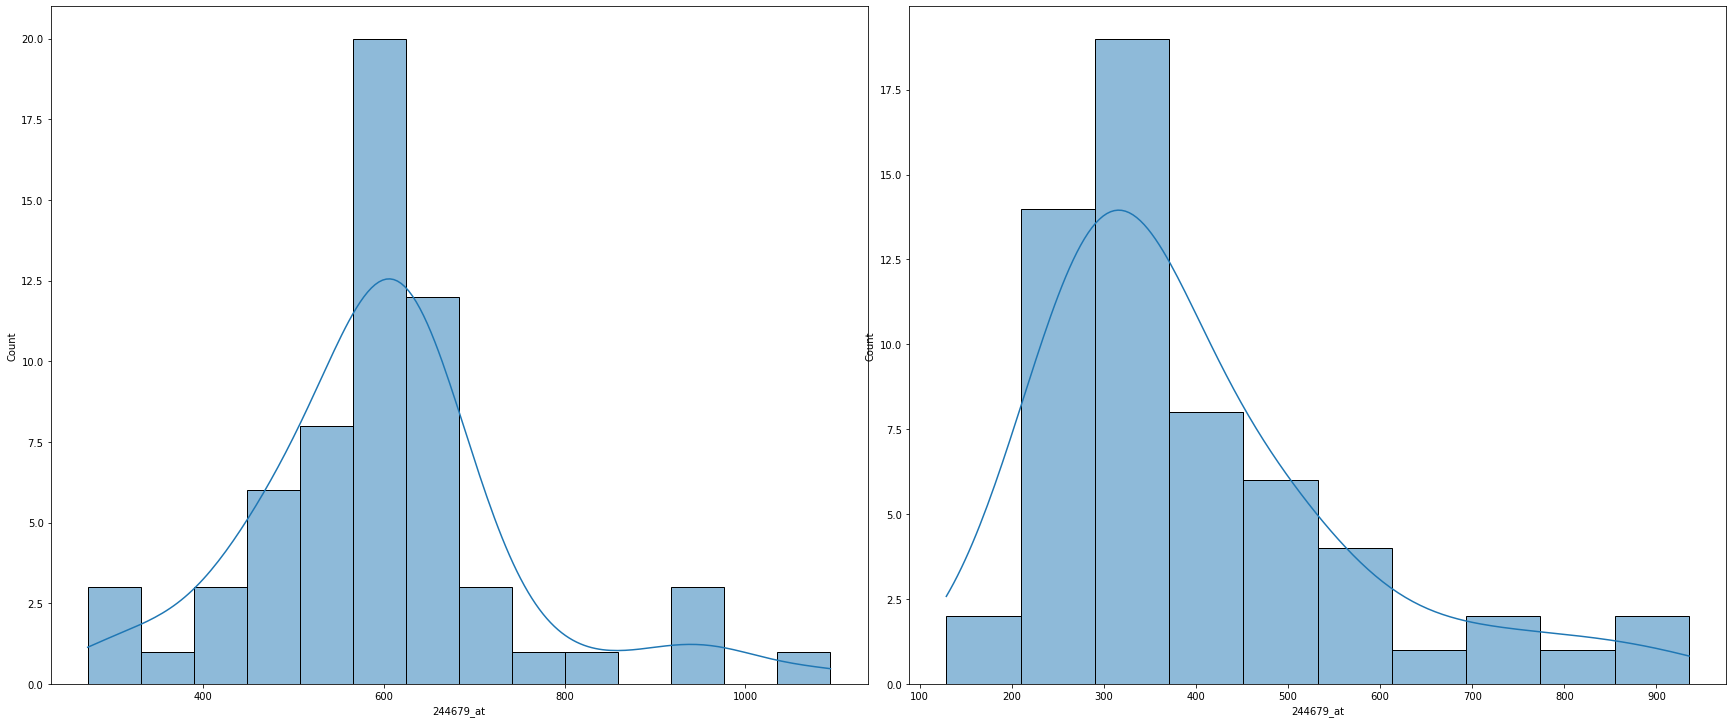

In [36]:
dataset_0 = dataset[dataset['label']==0]
dataset_1 = dataset[dataset['label']==1]

fig, axs = plt.subplots(figsize=(24,10), nrows=1, ncols = 2)
fig.tight_layout()
sns.histplot(dataset_0['244679_at'], kde=True, ax = axs[0])
sns.histplot(dataset_1['244679_at'], kde=True, ax = axs[1])
plt.show()

In [37]:
dataset.groupby('label')['244679_at'].describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
0,62.0,600.615339,147.629593,272.515,527.23925,603.518,647.20375,1094.150
1,59.0,395.457847,168.316452,128.894,285.50900,341.184,457.67600,935.387


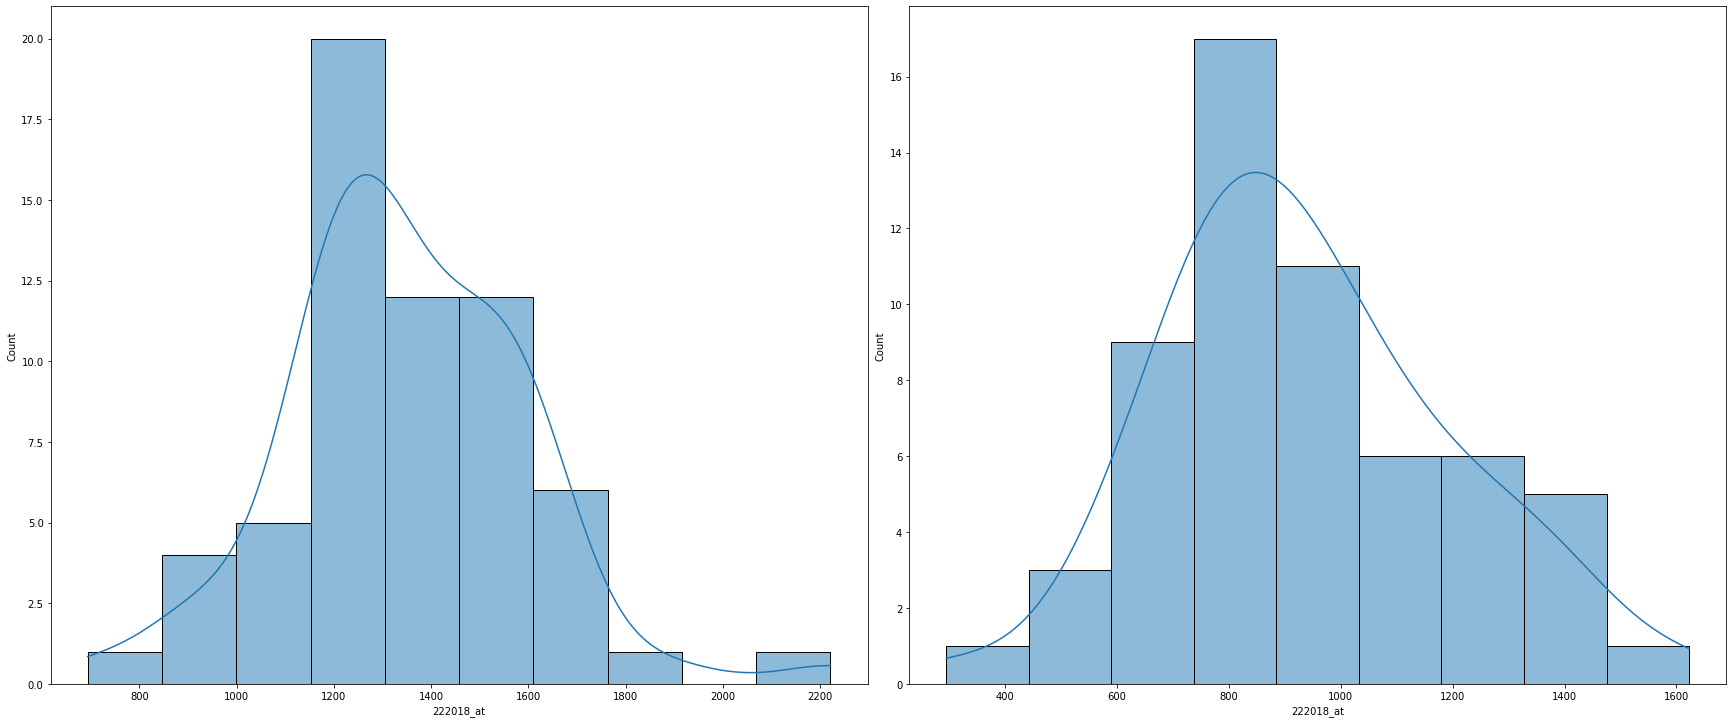

In [38]:
dataset_0 = dataset[dataset['label']==0]
dataset_1 = dataset[dataset['label']==1]
fig, axs = plt.subplots(figsize=(24,10), nrows=1, ncols = 2)
fig.tight_layout()
sns.histplot(dataset_0['222018_at'], kde=True, ax = axs[0])
sns.histplot(dataset_1['222018_at'], kde=True, ax = axs[1])
plt.show()

In [39]:
dataset_ver2 = dataset[ftr_top20.index]
dataset_ver2['label'] = dataset['label']
X = dataset_ver2.iloc[:,:-1]
y = dataset_ver2.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
smote = SMOTE()
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', X_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', X_train_over.shape, y_train_over.shape)
print(y_train_over.value_counts())


SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (96, 20) (96,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (98, 20) (98,)
1    49
0    49
Name: label, dtype: int64


C:\Users\jinsung\AppData\Local\Temp/ipykernel_33852/1464093021.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_ver2['label'] = dataset['label']


In [40]:
#LightGBM을 이용한 분류
lgbm_wrapper = LGBMClassifier(n_estimators=1000, learning_rate=0.05)
lgbm_wrapper.fit(X_train_over, y_train_over, verbose=True)
preds = lgbm_wrapper.predict(X_test)
get_clf_eval(y_test, preds)

c:\users\jinsung\appdata\local\programs\python\python39\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


오차 행렬
[[15  0]
 [ 0 10]]
정확도: 1.0000, 정밀도: 1.0000, 재현율: 1.0000, F1:1.0000
